In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


Let's use the "Diabetes" dataset again and apply the feature importance approach using Random Forests to interpret the importance of features. We'll use scikit-learn to build a Random Forest CLassifier and extract the feature importances.

In [8]:
random_state = 24

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target 

# binarizing the target
y = y>=np.median(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [9]:
# Create and fit the Random Forest Regressor model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.7191011235955056


## Feature Importance in Random Forest

The feature importance in Random Forest, is computed by averaging the feature importance for the $i$ th feature across all the $T$ trees in the forest:

$F_i^{Forest} = \frac{\sum_{j=1}^{T} F_i^j}{T}$

The feature importance $F_i$ can be normalized to a value between 0 and 1 by dividing it by the sum of all feature importances across all $P$ features:

$\hat{F}_i^{Forest} = \frac{F_i^{Forest}}{\sum_{k=1}^P F_k^{Forest}}$

In [11]:
# Retrieve the feature importances and feature names
importances = model.feature_importances_
feature_names = diabetes_data.feature_names

# Create a DataFrame to store the importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

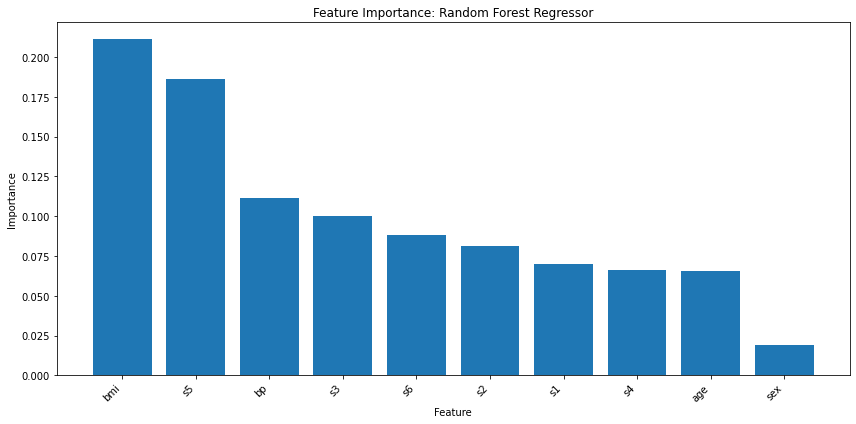

In [13]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance: Random Forest Regressor')
plt.tight_layout()
plt.show()



**Exercise 6:** Try different random states when defining the model. How does it affect the final feature importance results?



Changing the random state in a Random Forest model affects the bootstrapping sampling process for each decision tree, leading to varying feature importance measures. Because Random Forest randomly selects a subset of data for each tree in the forest. Different random states will produce different subsets, affecting the trees that are built. Therefore, feature importance will vary given different random states.

**Exercise 7:** Research on potential problems with impurity-based feature importance methods in random forest and decision tree.

impurity-based feature importance in Random Forests and Decision Trees can be misleading because they favor features with more unique values (higher information gain) and can be biased if features are correlated even if both are informative for the outcome variable. They can also be unstable, changing with different random settings, and may not show the full picture like how features interact with each other or their effect direction (positive or negative).